In [9]:
import pandas as pd 
ad = pd.read_csv("Advertising.csv")
df = ad.copy()
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [10]:
df = df.iloc [:,1:len(df)]

In [11]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [7]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
sales,200.0,14.0225,5.217457,1.6,10.375,12.90,17.400,27.0


In [9]:
df.isnull().values.any()

False

In [10]:
df.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


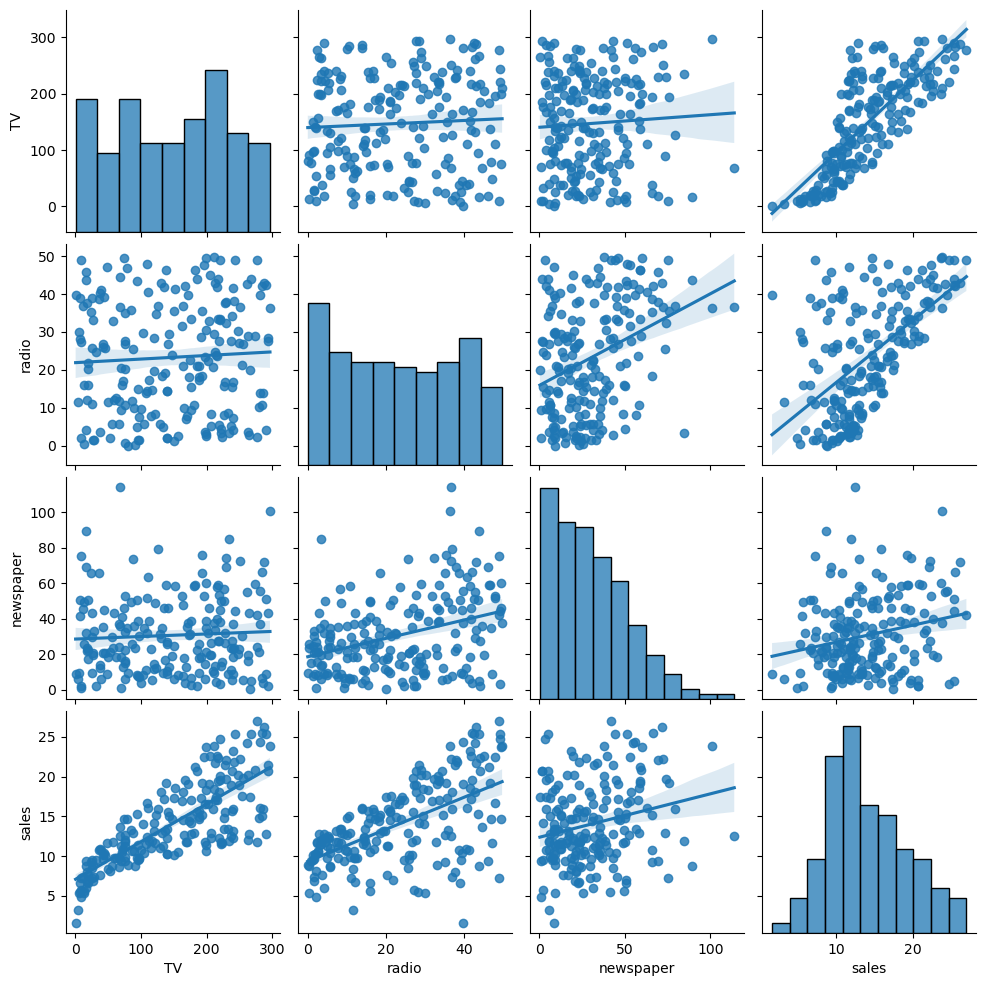

In [12]:
import seaborn as sns 
sns.pairplot(df, kind = "reg")

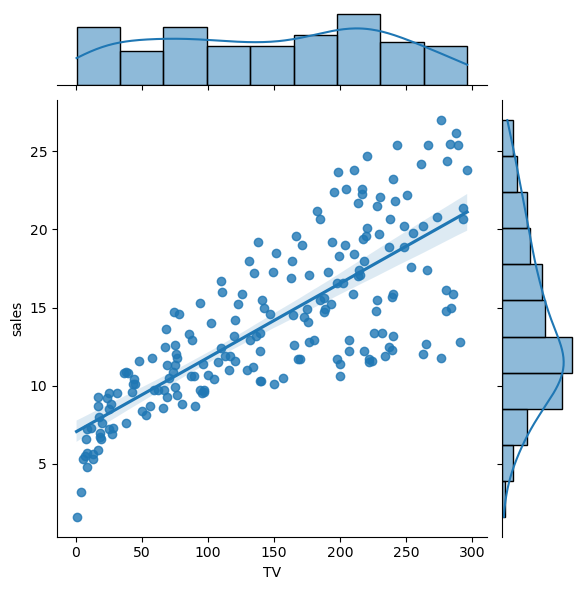

In [52]:
sns.jointplot(x="TV", y= "sales",data=df, kind="reg")

In [ ]:
Statsmodel ile modelleme

In [53]:
import statsmodels.api as sm 

In [54]:
X = df [["TV"]]
X[0:5]

,TV
0,230.1
1,44.5
2,17.2
3,151.5
4,180.8


In [55]:
X = sm.add_constant(X)

In [56]:
X[0:5]

,const,TV
0,1.0,230.1
1,1.0,44.5
2,1.0,17.2
3,1.0,151.5
4,1.0,180.8


In [57]:
y = df ["sales"]

In [58]:
y[0:5]

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: sales, dtype: float64

In [59]:
lm = sm.OLS(y,X)

In [60]:
model = lm.fit()

In [44]:
model.summary ()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  sales   R-squared (uncentered):                   0.897
Model:                            OLS   Adj. R-squared (uncentered):              0.896
Method:                 Least Squares   F-statistic:                              1733.
Date:                Tue, 19 Nov 2024   Prob (F-statistic):                   3.52e-100
Time:                        16:50:00   Log-Likelihood:                         -597.51
No. Observations:                 200   AIC:                                      1197.
Df Residuals:                     199   BIC:                                      1200.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
TV             0.0832      0.002     41.633      0.000       0.079       0.087
==============================================================================
Omnibus:                       20.228   Durbin-Watson:                   1.707
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               23.930
Skew:                          -0.846   Prob(JB):                     6.36e-06
Kurtosis:                       3.086   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [61]:
import statsmodels.formula.api as smf
lm = smf.ols("sales ~ TV",df)
model = lm.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Tue, 19 Nov 2024   Prob (F-statistic):           1.47e-42
Time:                        16:58:49   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [46]:
model.params

TV    0.08325
dtype: float64

In [47]:
model.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
TV,0.0832,0.002,41.633,0.000,0.079,0.087


In [48]:
model.conf_int()

,0,1
TV,0.079306,0.087193


In [20]:
model.f_pvalue

1.467389700194647e-42

In [62]:
print("f_pvalue: ", "%.3f" % model.f_pvalue)

f_pvalue:  0.000


In [63]:
model.mse_model

3314.618166868649

In [25]:
model.rsquared

0.611875050850071

In [26]:
model.fittedvalues[0:5]

0    17.970775
1     9.147974
2     7.850224
3    14.234395
4    15.627218
dtype: float64

In [30]:
y[0:5]

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: sales, dtype: float64

In [64]:
print("Sales = " + "%.2f" % model.params[0] + " + TV * " + "%.2f" % model.params[1])


Sales = 7.03 + TV * 0.05


C:\Users\Durnisa\AppData\Local\Temp\ipykernel_13968\2319540206.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("Sales = " + "%.2f" % model.params[0] + " + TV * " + "%.2f" % model.params[1])


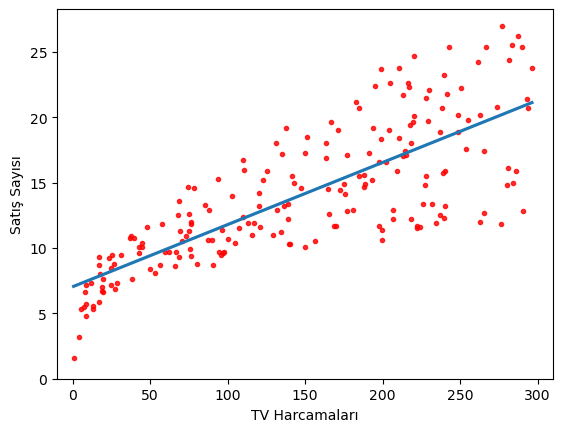

In [66]:
import seaborn as sns
import matplotlib.pyplot as plt

# Regresyon grafiği
g = sns.regplot(
    x=df["TV"], 
    y=df["sales"], 
    ci=None, 
    scatter_kws={'color': 'r', 's': 9}
)
g.set_ylabel("Satış Sayısı")
g.set_xlabel("TV Harcamaları")

# Eksen sınırları
plt.xlim(-10, 310)
plt.ylim(bottom=0)
# Grafiği göster
plt.show()

In [67]:
from sklearn.linear_model import LinearRegression

In [69]:
x= df [["TV"]]
y = df[["sales"]]
reg=LinearRegression()
model= reg.fit(X,y)
model.intercept_
model.coef_

array([[0.        , 0.04753664]])

In [70]:
model.score(X,y)

0.6118750508500712

In [71]:
model.predict (X)[0:10]

array([[17.97077451],
       [ 9.14797405],
       [ 7.85022376],
       [14.23439457],
       [15.62721814],
       [ 7.44616232],
       [ 9.76595037],
       [12.74649773],
       [ 7.44140866],
       [16.53041431]])